In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../src/')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path

from preprocessing import BagOfNotes, MidiPathToDataFrame, PreprocessMidiDataFrame

In [ ]:
import logging

logging.basicConfig(level=logging.INFO)

In [4]:
data_dir = Path('../maestro/maestro-v3.0.0/')

In [9]:
pipeline = Pipeline([
    ('loader', MidiPathToDataFrame(data_dir)),
    ('cleaner', PreprocessMidiDataFrame()),
    ('BoN', BagOfNotes(normalize=False)),
    ('pca', PCA(2)),
])
df = pd.read_csv(data_dir / 'maestro-v3.0.0.csv')
sample = df.sample(300)

In [10]:
transformed = pipeline.fit_transform(sample.midi_filename)

DEBUG:root:Loaded 0 of 300


DEBUG:root:Loaded 15 of 300
DEBUG:root:Loaded 30 of 300
DEBUG:root:Loaded 45 of 300
DEBUG:root:Loaded 60 of 300
DEBUG:root:Loaded 75 of 300
DEBUG:root:Loaded 90 of 300
DEBUG:root:Loaded 105 of 300
DEBUG:root:Loaded 120 of 300
DEBUG:root:Loaded 135 of 300
DEBUG:root:Loaded 150 of 300
DEBUG:root:Loaded 165 of 300
DEBUG:root:Loaded 180 of 300
DEBUG:root:Loaded 195 of 300
DEBUG:root:Loaded 210 of 300
DEBUG:root:Loaded 225 of 300
DEBUG:root:Loaded 240 of 300
DEBUG:root:Loaded 255 of 300
DEBUG:root:Loaded 270 of 300
DEBUG:root:Loaded 285 of 300
c:\Users\benkc\projects\melodies\experiments\../src\preprocessing.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_note_event_time'] = df.groupby('note').shift(-1)['time_from_start']
c:\Users\benkc\

In [11]:
def get_color(composer):
    if composer == 'Franz Schubert':
        return 'r'
    if composer == 'Frédéric Chopin':
        return 'g'
    if composer == 'Franz Liszt':
        return 'b'
    if composer == 'Johann Sebastian Bach':
        return 'c'
    if composer == 'Ludwig van Beethoven':
        return 'm'
    return 'k'
sample.canonical_composer.value_counts()

canonical_composer
Frédéric Chopin                                       46
Ludwig van Beethoven                                  33
Johann Sebastian Bach                                 33
Franz Schubert                                        29
Franz Liszt                                           29
Claude Debussy                                        16
Robert Schumann                                       16
Sergei Rachmaninoff                                   13
Felix Mendelssohn                                     12
Wolfgang Amadeus Mozart                               11
Joseph Haydn                                          10
Alexander Scriabin                                    10
Domenico Scarlatti                                     5
Johannes Brahms                                        4
Pyotr Ilyich Tchaikovsky                               3
Franz Schubert / Franz Liszt                           3
Pyotr Ilyich Tchaikovsky / Mikhail Pletnev             2
Modest Musso

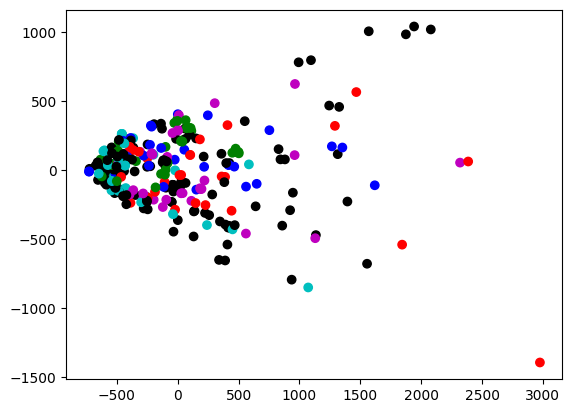

In [12]:
plt.scatter(transformed[:, 0], transformed[:, 1], c=[get_color(comp) for comp in sample.canonical_composer])
plt.show()